# HW1

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Hitters.csv")

In [3]:
df.head()

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0          N  
2   480.0          A  
3   500.0          N  
4    91.5          N  

[5 rows x 21 columns]

In [4]:
df = df[df['Salary'].notna()]
df = df.select_dtypes(['number'])

df.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  
5   336     194      282      421      25   750.0

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['Salary'],axis=1).values)
Y = df['Salary'].values
features = list(df.drop(['Salary'],axis=1).columns)


## 1.1 Lasso

Text(0.5, 1.0, 'Lasso')

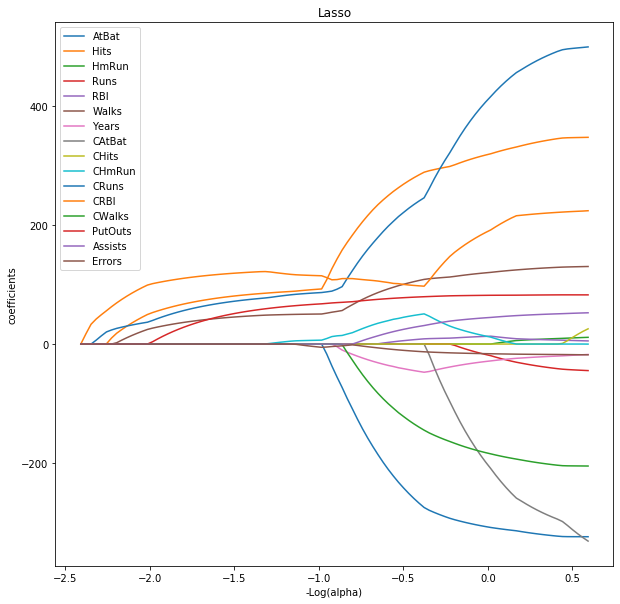

In [39]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X,Y)
log_lasso_alphas = -np.log10(lasso_alphas)

plt.figure(1,figsize=(10,10))
for c,f in zip(lasso_coefs, features):  
    f1 = plt.plot(log_lasso_alphas,c,label = f)
    
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.legend()
plt.title('Lasso')

From the graph, the three features are Hits, CRBI and AtBat

In [42]:
lasso_model = linear_model.LassoCV().fit(X,Y)

print("Optimal penalty:", lasso_model.alpha_)

selected_features = []
for i in range(len(lasso_model.coef_)):
    if lasso_model.coef_[i] != 0:
        selected_features.append(features[i])
print(len(selected_features),"features are selected")
print("Those features are", selected_features)

Optimal penalty: 1.9311154418875123
13 features are selected
Those features are ['AtBat', 'Hits', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']


## 1.2 Ridge 

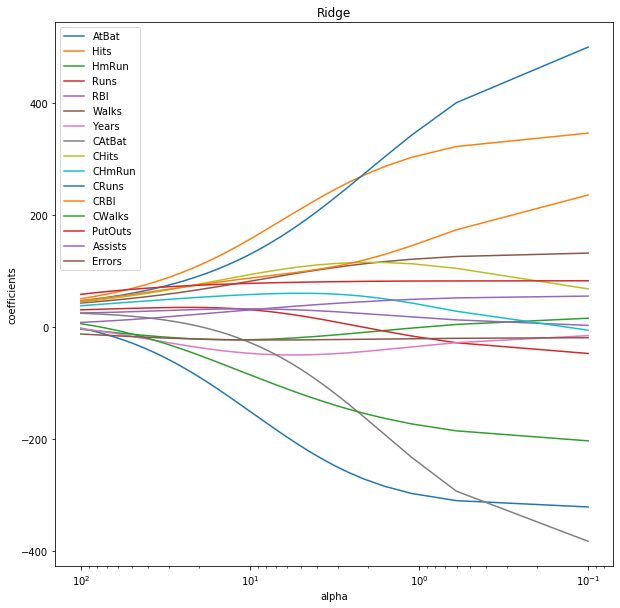

In [59]:
n_alphas = 200
alphas = np.linspace(0.1, 100, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
plt.figure(2,figsize=(10,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge')
plt.legend(features)
plt.show()

In [61]:
ridge_model = linear_model.RidgeCV(alphas).fit(X,Y)

print("Optimal penalty:", ridge_model.alpha_)

selected_features = []
for i in range(len(ridge_model.coef_)):
    if ridge_model.coef_[i] >= 0:
        selected_features.append(features[i])
print(len(selected_features),"features are selected")


Optimal penalty: 3.112060301507538
10 features are selected


# 2

The bias-variance trade off is when the model achieves lower bias error the variance will increase and when the model gets lower variance the bias will increase. With regularization, the model can trade between bias and variance. With high penalty, the model will have a high bias and low variance; with low penalty, the model will get relatively low bias but high variance. Referring the first part, we can see when the alpha increases, the more features are elminated and results in a high bias. 